In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Need to import the required library so that we will not get the error to run the code

In [3]:
import pandas as pd

url = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv'
df = pd.read_csv(url, encoding='latin1')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Here we have to read the csv file to get the dataset. First we have to use the encoding latin1 to get read the dataset as we are not getting read this dataset with read.csv.

In [4]:
country_code_data = pd.read_excel("https://github.com/dsrscientist/dataset4/raw/main/Country-Code.xlsx")
country_code_data

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


Also we are provided with excel dataset which we have to read the data with pd.read_excel

In [5]:
merged_data = pd.merge(df, country_code_data, how='left', on='Country Code')


Now we have to merge both the dataset to get only one dataset with all the informations

In [6]:
merged_data.shape

(9551, 22)

In [7]:
merged_data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
merged_data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

We need to check the null values from the dataset so that we can easily proceed with the data for prediction.

In [9]:
merged_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [10]:
merged_data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


We will check the head and tail of the dataset

In [11]:
categorical_col=[]
for i in merged_data.dtypes.index:
    if merged_data.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")

numerical_col=[]
for i in merged_data.dtypes.index:
    if merged_data.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns:  ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


Numerical Columns:  ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


We will check the categorical and numerical data from the dataset so that we can verify which is categorical data which needs to be converted into numerical data to get the proper prediction

In [12]:
merged_data.drop(['Restaurant Name'], axis=1, inplace=True)
merged_data.drop(['City'], axis=1, inplace=True)
merged_data.drop(['Address'], axis=1, inplace=True)
merged_data.drop(['Locality'], axis=1, inplace=True)
merged_data.drop(['Locality Verbose'], axis=1, inplace=True)
merged_data.drop(['Cuisines'], axis=1, inplace=True)
merged_data.drop(['Currency'], axis=1, inplace=True)
merged_data.drop(['Has Table booking'], axis=1, inplace=True)
merged_data.drop(['Has Online delivery'], axis=1, inplace=True)
merged_data.drop(['Is delivering now'], axis=1, inplace=True)
merged_data.drop(['Switch to order menu'], axis=1, inplace=True)
merged_data.drop(['Rating color'], axis=1, inplace=True)
merged_data.drop(['Rating text'], axis=1, inplace=True)

We have to drop the unnecessary data from the dataset so that we will easily be able to convert the required data easily 

<AxesSubplot:>

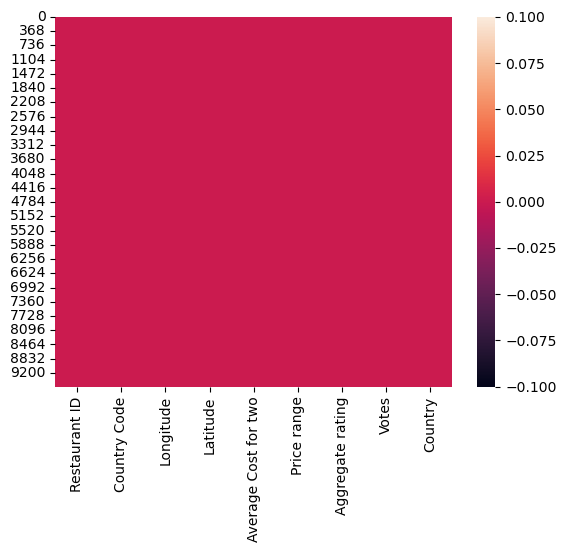

In [13]:
sns.heatmap(merged_data.isnull())

Here we will create the heatmap for the null data

In [14]:
merged_data.skew()

Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

We will check the skewness of the dataset to proceed further

In [15]:
merged_data['Country Code'] = np.cbrt(merged_data['Country Code'])

In [16]:
merged_data['Longitude'] = np.cbrt(merged_data['Longitude'])

In [17]:
merged_data['Latitude'] = np.cbrt(merged_data['Latitude'])

In [18]:
merged_data['Average Cost for two'] = np.cbrt(merged_data['Average Cost for two'])

In [19]:
merged_data['Votes'] = np.cbrt(merged_data['Votes'])

In [20]:
merged_data.skew()

Restaurant ID           0.061570
Country Code            2.923867
Longitude              -2.928779
Latitude               -3.856661
Average Cost for two    9.626632
Price range             0.889618
Aggregate rating       -0.954130
Votes                   1.204920
dtype: float64

Here we have reduced the skewness from the dataset 

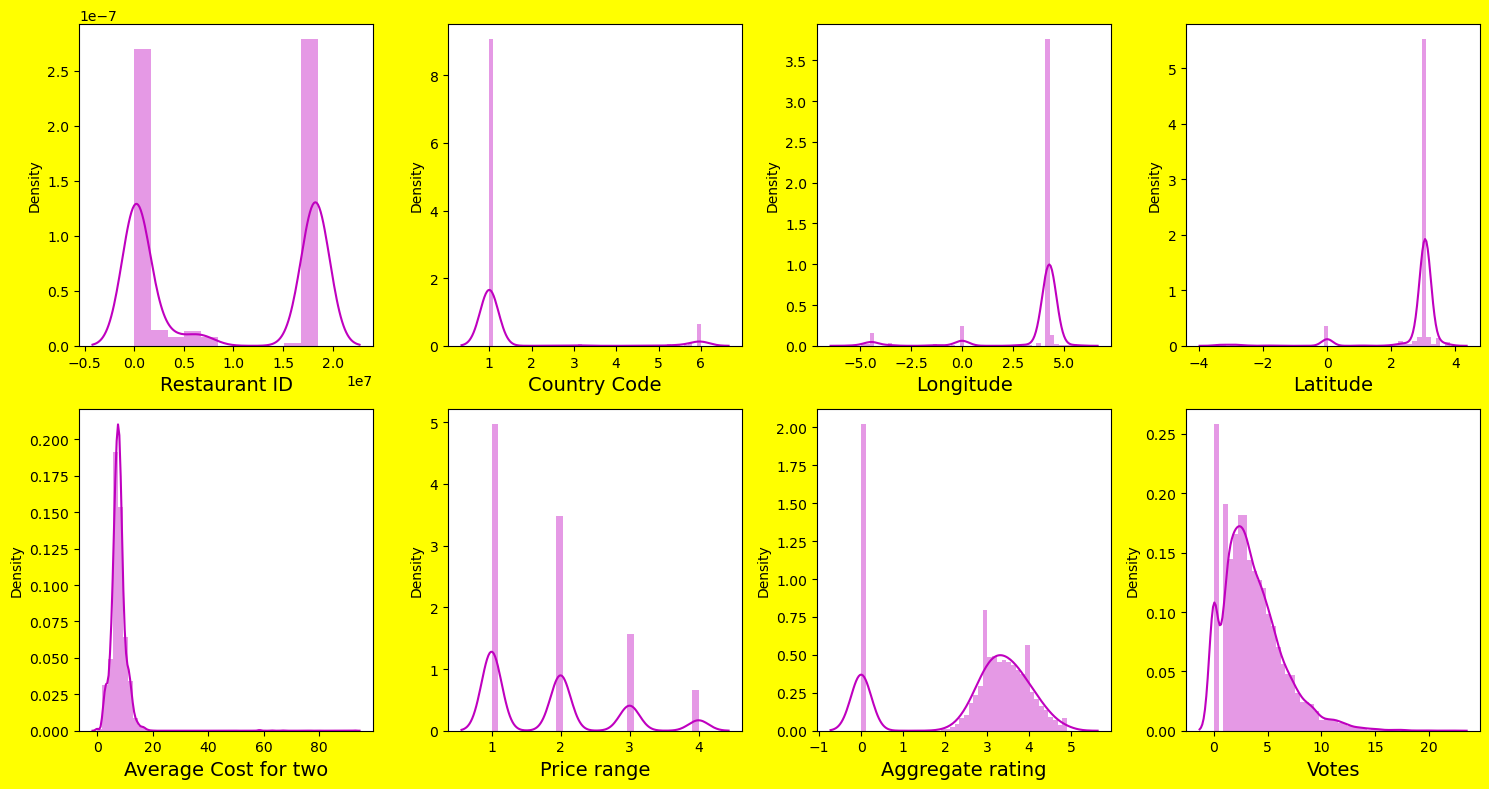

In [21]:
plt.figure(figsize=(15,8), facecolor= "yellow")
plotnumber=1
for col in merged_data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(merged_data[col], color="m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber+=1
        plt.tight_layout()

Here created the distplot from the dataset to check the skewness of the dataset 

0.000000    1094
1.000000     483
1.259921     327
1.442250     244
1.587401     207
            ... 
8.504035       1
8.133187       1
9.371302       1
8.662391       1
9.658468       1
Name: Votes, Length: 1012, dtype: int64


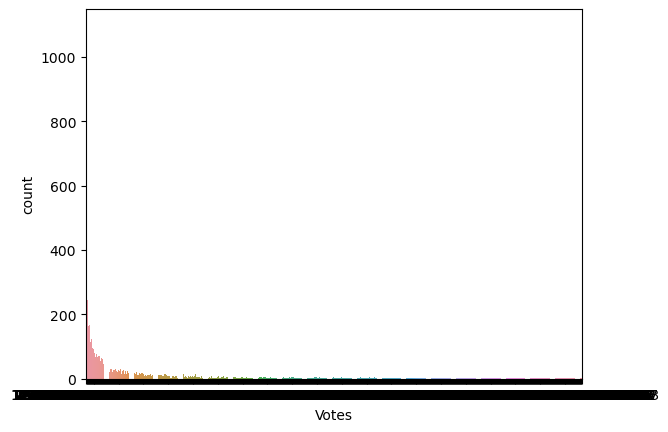

In [22]:
ax=sns.countplot(x='Votes', data=merged_data)
print(merged_data['Votes'].value_counts())

Here created the countplot for the votes dataset

0.000000    498
3.057210     16
3.056395      9
3.057210      9
3.058023      8
           ... 
3.059735      1
3.059771      1
3.059846      1
3.059676      1
3.447790      1
Name: Latitude, Length: 8677, dtype: int64


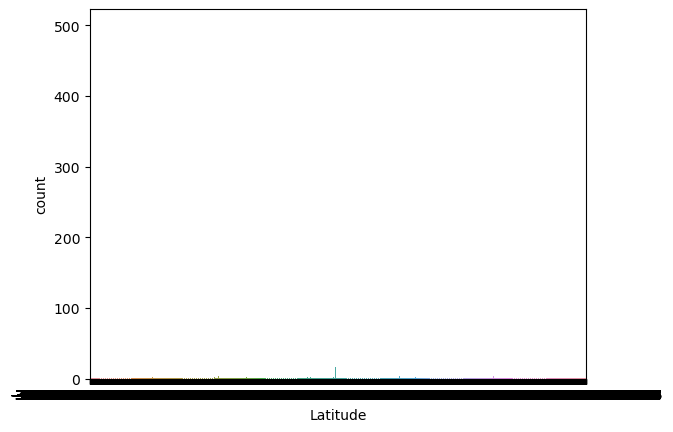

In [23]:
ax=sns.countplot(x='Latitude', data=merged_data)
print(merged_data['Latitude'].value_counts())

Now created the countplot for the latitude dataset

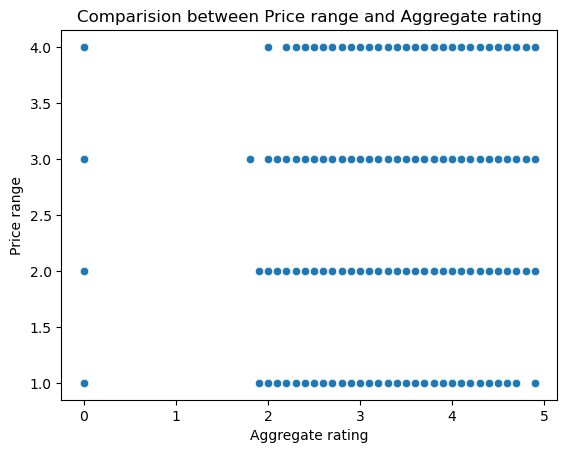

In [24]:
plt.title("Comparision between Price range and Aggregate rating")
sns.scatterplot(x='Aggregate rating', y='Price range', data=merged_data, palette= 'bright')
plt.show()

Created the scatterplot for the price range and aggregate ratings from the dataset

In [29]:
merged_data=pd.get_dummies(merged_data).astype(int)
merged_data.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Country_Australia,Country_Brazil,...,Country_New Zealand,Country_Phillipines,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom,Country_United States
0,6317637,5,4,2,10,3,4,6,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6304287,5,4,2,10,3,4,8,0,0,...,0,1,0,0,0,0,0,0,0,0
2,6300002,5,4,2,15,4,4,6,0,0,...,0,1,0,0,0,0,0,0,0,0
3,6318506,5,4,2,11,4,4,7,0,0,...,0,1,0,0,0,0,0,0,0,0
4,6314302,5,4,2,11,4,4,6,0,0,...,0,1,0,0,0,0,0,0,0,0


Created the dummy of the dataset so that all the categorical data will be converted into numerical data

In [30]:
cor= merged_data.corr()
cor

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Country_Australia,Country_Brazil,...,Country_New Zealand,Country_Phillipines,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom,Country_United States
Restaurant ID,1.000000,0.157584,-0.233370,-0.081382,-0.138570,-0.134540,-0.297840,-0.312906,0.043836,-0.019730,...,-0.004290,-0.003161,0.010199,0.049155,-0.011820,-0.016937,-0.020977,-0.019404,-0.021495,0.207108
Country Code,0.157584,1.000000,-0.748549,-0.220759,-0.240713,0.248566,0.295510,0.306553,0.023690,0.099949,...,0.183349,0.135847,0.129511,0.129511,0.224792,0.129511,0.168986,0.224792,0.259842,0.788143
Longitude,-0.233370,-0.748549,1.000000,0.322300,0.305371,-0.099254,-0.135826,-0.150783,0.040571,-0.255352,...,0.055165,0.016474,-0.007555,0.015706,-0.026570,0.011054,-0.009857,-0.013113,-0.190163,-0.816604
Latitude,-0.081382,-0.220759,0.322300,1.000000,-0.063492,-0.209892,-0.061277,-0.039375,-0.270401,-0.363316,...,-0.355215,-0.030907,-0.029466,-0.074429,-0.389330,-0.076677,0.020222,-0.051144,0.031094,0.063946
Average Cost for two,-0.138570,-0.240713,0.305371,-0.063492,1.000000,0.449847,0.168772,0.243355,-0.071302,-0.062572,...,-0.069098,0.047469,-0.024568,-0.036688,-0.012378,0.068568,-0.057125,-0.054453,-0.108485,-0.298643
Price range,-0.134540,0.248566,-0.099254,-0.209892,0.449847,1.000000,0.435535,0.514229,0.017745,0.140058,...,0.096333,0.082710,0.093339,0.093339,0.156155,0.052870,0.067238,0.123961,0.095926,0.058125
Aggregate rating,-0.297840,0.295510,-0.135826,-0.061277,0.168772,0.435535,1.000000,0.674333,0.029675,0.060139,...,0.075230,0.057663,0.041373,0.027924,0.085427,0.041373,0.068563,0.086399,0.088066,0.196058
Votes,-0.312906,0.306553,-0.150783,-0.039375,0.243355,0.514229,0.674333,1.000000,0.010506,-0.034947,...,0.054243,0.060979,0.025943,-0.004775,0.078599,0.022530,0.068234,0.105258,0.048626,0.247829
Country_Australia,0.043836,0.023690,0.040571,-0.270401,-0.071302,0.017745,0.029675,0.010506,1.000000,-0.003991,...,-0.003255,-0.002412,-0.002299,-0.002299,-0.003991,-0.002299,-0.003000,-0.003991,-0.004613,-0.010951
Country_Brazil,-0.019730,0.099949,-0.255352,-0.363316,-0.062572,0.140058,0.060139,-0.034947,-0.003991,1.000000,...,-0.005156,-0.003820,-0.003642,-0.003642,-0.006322,-0.003642,-0.004752,-0.006322,-0.007307,-0.017348


Here verifying the correlation between the dataset to proceed further

In [31]:
y=merged_data['Price range']
x=merged_data.drop(columns=['Price range','Average Cost for two'])

In [32]:
y_cost=merged_data['Average Cost for two']
x_cost=merged_data.drop(columns=['Price range','Average Cost for two'])

Here drop the target values which are Price range and average cost of two

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Restaurant ID,Country Code,Longitude,Latitude,Aggregate rating,Votes,Country_Australia,Country_Brazil,Country_Canada,Country_India,...,Country_New Zealand,Country_Phillipines,Country_Qatar,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Turkey,Country_UAE,Country_United Kingdom,Country_United States
0,-0.310940,2.827235,0.342861,-0.643237,1.233442,1.032015,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,20.811928,-0.045808,-0.045808,-0.07951,-0.045808,-0.059771,-0.07951,-0.091907,-0.218182
1,-0.312458,2.827235,0.342861,-0.643237,1.233442,1.777104,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,20.811928,-0.045808,-0.045808,-0.07951,-0.045808,-0.059771,-0.07951,-0.091907,-0.218182
2,-0.312946,2.827235,0.342861,-0.643237,1.233442,1.032015,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,20.811928,-0.045808,-0.045808,-0.07951,-0.045808,-0.059771,-0.07951,-0.091907,-0.218182
3,-0.310841,2.827235,0.342861,-0.643237,1.233442,1.404560,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,20.811928,-0.045808,-0.045808,-0.07951,-0.045808,-0.059771,-0.07951,-0.091907,-0.218182
4,-0.311319,2.827235,0.342861,-0.643237,1.233442,1.032015,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,20.811928,-0.045808,-0.045808,-0.07951,-0.045808,-0.059771,-0.07951,-0.091907,-0.218182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,-0.356658,2.827235,-0.164918,0.338318,1.233442,2.149648,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,-0.048049,-0.045808,-0.045808,-0.07951,-0.045808,16.730564,-0.07951,-0.091907,-0.218182
9547,-0.357452,2.827235,-0.164918,0.338318,1.233442,2.522193,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,-0.048049,-0.045808,-0.045808,-0.07951,-0.045808,16.730564,-0.07951,-0.091907,-0.218182
9548,-0.356649,2.827235,-0.164918,0.338318,0.499494,1.777104,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,-0.048049,-0.045808,-0.045808,-0.07951,-0.045808,16.730564,-0.07951,-0.091907,-0.218182
9549,-0.356614,2.827235,-0.164918,0.338318,1.233442,2.149648,-0.050191,-0.07951,-0.020469,-3.102262,...,-0.064851,-0.048049,-0.045808,-0.045808,-0.07951,-0.045808,16.730564,-0.07951,-0.091907,-0.218182


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.294456,Restaurant ID
1,inf,Country Code
2,47.194146,Longitude
3,20.549105,Latitude
4,1.957046,Aggregate rating
5,2.156175,Votes
6,inf,Country_Australia
7,inf,Country_Brazil
8,inf,Country_Canada
9,inf,Country_India


In [36]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Creating the model for the dataset for the prediction of target variables

In [38]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 0.5305624395115798
R-squared (R2) Score: 0.3537294461380416


In [39]:
import joblib
joblib.dump(model,"Price range.pkl")

['Price range.pkl']

In [40]:
model = joblib.load("Price range.pkl")
prediction = model.predict(X_test)
prediction

array([1.6445964 , 2.05112059, 1.72288571, ..., 1.68231826, 2.58256275,
       2.1964872 ])

In [41]:
a = np.array(y_test) 
merged_data = pd.DataFrame()
merged_data["Predicted"] = prediction
merged_data["Original"]=a
merged_data

,Predicted,Original
0,1.644596,1
1,2.051121,2
2,1.722886,2
3,2.195851,1
4,1.682161,1
...,...,...
1906,1.644576,2
1907,1.199193,1
1908,1.682318,2
1909,2.582563,3


Here we have predicted the 1st target variable that is Price range of the zomato restaurant dataset

In [42]:
from sklearn.model_selection import train_test_split

X_train_cost, X_test_cost, y_train_cost, y_test_cost= train_test_split(x_cost, y_cost, test_size=0.2, random_state=42)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x_cost.values, i) for i in range(len(x.columns))]
vif["Features"]=x_cost.columns
vif

,VIF values,Features
0,1.294469,Restaurant ID
1,inf,Country Code
2,47.194146,Longitude
3,20.549105,Latitude
4,1.957046,Aggregate rating
5,2.156175,Votes
6,inf,Country_Australia
7,inf,Country_Brazil
8,inf,Country_Canada
9,inf,Country_India


In [44]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [45]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_cost, y_train_cost)

LinearRegression()

In [46]:
y_pred_cost = model.predict(X_test_cost)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_cost, y_pred_cost)
r2 = r2_score(y_test_cost, y_pred_cost)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 3.7209249595454383
R-squared (R2) Score: 0.7169176394760559


In [47]:
import joblib
joblib.dump(model,"Average Cost for two.pkl")

['Average Cost for two.pkl']

In [48]:
model = joblib.load("Average Cost for two.pkl")
prediction = model.predict(X_test)
prediction

array([ 10.5634836 ,  11.03903041,  10.73253555, ...,  10.59509271,
        11.12690458, -16.2715578 ])

In [49]:
a = np.array(y_test) 
merged_data = pd.DataFrame()
merged_data["Predicted"] = prediction
merged_data["Original"]=a
merged_data

,Predicted,Original
0,10.563484,1
1,11.039030,2
2,10.732536,2
3,11.176473,1
4,10.595093,1
...,...,...
1906,10.563484,2
1907,9.950494,1
1908,10.595093,2
1909,11.126905,3


Now we have created the model and predicted the 2nd target variable which is average of two from the zomato restaurant dataset